In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import tensorflow as tf
from sklearn import linear_model

In [32]:
# Generate sample
# y = a1 * x1 + a2 * x2 + eps
numObs = 100
rndSmpl = np.random.normal(0, 1, [numObs, 3])
alpha = 1.9
beta = np.array([-1.7, 2.3])
x = rndSmpl[:,0:2]
eps = rndSmpl[:, 2]
y = alpha + np.matmul(x, beta) + eps

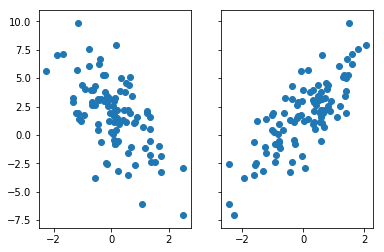

In [39]:
#Plot sample

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x[:,0], y)
ax2.scatter(x[:,1], y)

In [42]:
# Fit linear regression using sk-learn
skLR = linear_model.LinearRegression()
skLR.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

alpha-coef: 1.85940007377 ; beta-coef:  [-1.80247351  2.23303453]


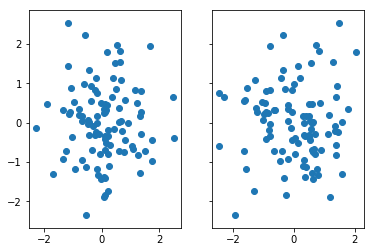

In [58]:
# Output linear regression (sk-learn) results
print('alpha-coef:', skLR.intercept_, '; beta-coef: ', skLR.coef_)
y_sk = skLR.predict(x)
r_sk = y - y_sk

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x[:,0], r_sk)
ax2.scatter(x[:,1], r_sk)

In [193]:
# Gradient Descent using simple numpy
def linreg_gd(x, y, learning_rate=0.1, num_steps=100, eps = 1e-7):
    widex = np.column_stack([np.ones(( np.shape(x)[0], 1)), x])
    yt =np.reshape(y, (np.shape(x)[0], 1))
    b = np.zeros((np.shape(widex)[1],1))
    for i in range(num_steps):
        #calculate gradient
        #sum of (yi - bT * xi)^2=>
        # => <y - bT * X, y - bT * X>
        # => <y,y> - 2 <y, bT * x> + <bT, bT*X*XT>
        # d/db => - 2 XT * y + 2XT * X * bT
        # => -2XT( y - X * bT )
        
        #1. calc y - bT * x
        #print(b)
        resid = y - np.matmul(widex, b).transpose()
        #2. calc gradient
        grad = 2.0 * np.matmul(resid,widex).transpose()
        #print(grad)
        delta = grad * learning_rate
        
        if(np.dot(grad.transpose(),grad) < eps*eps):
           # print('Early stopping')
            return b+delta
        #3. calc next step
        b = b + delta
    return None

In [194]:
man_coefs_ = linreg_gd(x, y, learning_rate=0.001, num_steps=1000, eps=1e-10)

alpha-coef: 1.85940007377 ; beta-coef:  [-1.80247351  2.23303453]


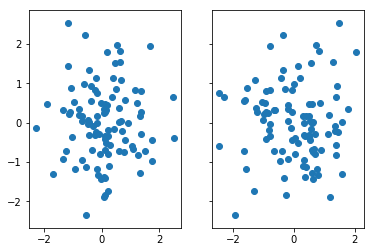

In [207]:
# Output linear regression (manual numpy) results
print('alpha-coef:', man_coefs_[0,0], '; beta-coef: ', man_coefs_[1:,0])
y_man = man_coefs_[0,0] + np.matmul(x, man_coefs_[1:])
r_man = y - y_man.transpose()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x[:,0], r_man)
ax2.scatter(x[:,1], r_man)

In [213]:
tfx = tf.Variable(3, name="x", dtype=tf.float32)
tfy = tf.Variable(4, name="y", dtype=tf.float32)
tff = tf.sqrt(tfx*tfx + tfy*tfy)

In [214]:
sess = tf.Session()
sess.run(tfx.initializer)
sess.run(tfy.initializer)
print(sess.run(tff))
sess.close()

5.0


In [246]:
tf_X = tf.constant(np.column_stack([np.ones(( np.shape(x)[0], 1)), x]), name='X', dtype=tf.float32)
tf_y = tf.constant(y.reshape((y.shape[0],1)), name='y', dtype=tf.float32)
tf_lr = tf.constant(1e-2, name='learning_rate', dtype=tf.float32)
tf_b = tf.Variable(np.zeros((x.shape[1]+1, 1)), dtype=tf.float32)
tf_resid = tf_y - tf.matmul(tf_X, tf_b)
tf_grad = tf_lr * 2.0 * tf.matmul(tf.transpose(tf_X), tf_resid)
tf_delta = tf_lr * tf_grad
tf_trainstep = tf.assign(tf_b, tf_b + tf_delta)

In [250]:
tf_coef_ = None;
with tf.Session() as sess:
    tf_b.initializer.run()
    for i in range(1000):
        tf_trainstep.eval()
    tf_coef_ = tf_b.eval()
print(tf_coef_)

[[ 1.85939658]
 [-1.80246878]
 [ 2.23304105]]


alpha-coef: 1.8594 ; beta-coef:  [-1.80246878  2.23304105]


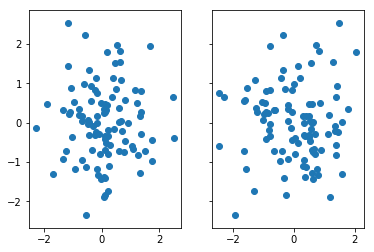

In [251]:
# Output linear regression (manual tensorflow) results
print('alpha-coef:', tf_coef_[0,0], '; beta-coef: ', tf_coef_[1:,0])
y_tf = tf_coef_[0,0] + np.matmul(x, tf_coef_[1:])
r_tf = y - y_tf.transpose()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x[:,0], r_tf)
ax2.scatter(x[:,1], r_tf)

In [ ]:
# tensorflow for SGD
# tensorflow autodiff